In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq

In [31]:
# total duration of signal [s]
T = 2
# sampling frequency
Fs = 200
# total samples
N = T * Fs
# fundamental frequency of signal [Hz]
f0 = 1

/tmp/ipython-input-832321737.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


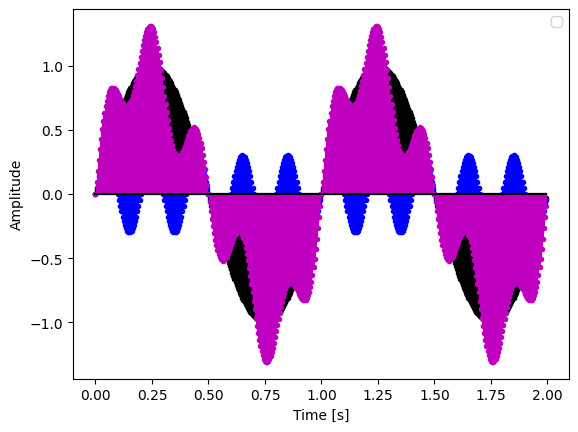

In [32]:
# generate samples over signal duration and sample frequency
t = np.arange(0, T, 1/Fs)
# generate signal with f0 frequency
x = np.sin(2 * np.pi * f0 * t)
# generate signal with 2*f0 frequency
y = 0.3 * np.sin(2 * np.pi * 5 * f0 * t)
v = 0.2 * np.sin(2 * np.pi * 2 * f0 * t)
# combine signals
z = x + y + v

plt.stem(t, x, linefmt='k-', markerfmt='k.', basefmt='k-')
plt.stem(t, y, linefmt='b-', markerfmt='b.', basefmt='k-')
plt.stem(t, z, linefmt='m-', markerfmt='m.', basefmt='k-')

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

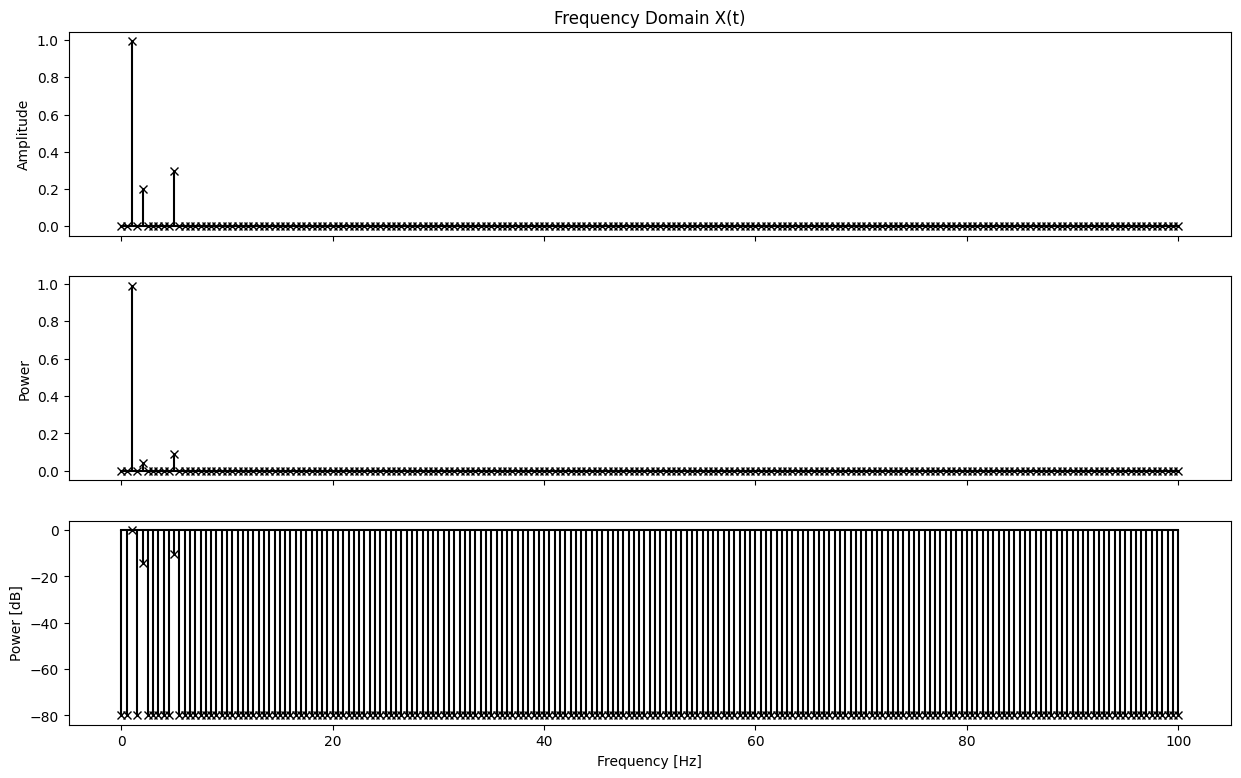

In [33]:
# FFT
Z = abs(rfft(z)) # spectrum
P = Z ** 2 # power spectrum
Z = Z / len(Z) # normalize amplitude
P = P / (len(P) ** 2)  # normalize power
Xt = rfftfreq(N, 1 / Fs)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 9), sharex=True)
ax[0].set_title("Frequency Domain X(t)")
ax[0].stem(Xt, Z, linefmt='k-', markerfmt='kx', basefmt='k-')
# ax[0].set_ylim([0, 1])
ax[0].set_ylabel("Amplitude")
ax[1].stem(Xt, P, linefmt='k-', markerfmt='kx', basefmt='k-')
# ax[1].set_xlim([0, 10])
ax[1].set_ylabel("Power")
ax[2].stem(Xt, 10 * np.log10(np.maximum(P, 1e-8)), linefmt='k-', markerfmt='kx', basefmt='k-')
ax[2].set_xlabel("Frequency [Hz]")
# ax[2].set_xlim([0, 10])
ax[2].set_ylabel("Power [dB]")
plt.show()